In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from scipy.signal import find_peaks as fp
from mpmath import ellipk,log
from scipy.special import gamma as GAMMA
import os 
#from mpl_toolkits import mplot3d
from scipy.optimize import fmin_cg, fmin_tnc, curve_fit, newton, bisect, fsolve
from SourcesTBG import *
from MoreSources import *
from scipy.misc import derivative as scider
import pandas as pd
from scipy.linalg import eigh,eig,eigvalsh
from functools import partial
import seaborn as sns
from FeynmanHellman import *
from saddlefinder import *
import csv
from Decorators import *
from YuanDos import *
from DosHelper import*
TO_DEGREE = 1.0/0.018326
IN_RADIAN = np.pi/180
vFpar = 4.31074647887324
wpar=0.11
BANDS = 8

In [2]:
angles = np.array([1.05,1.1,1.12,1.15])
#df = pd.DataFrame(columns=angles)
df = pd.DataFrame()
Evs = [ret_alpha_beta_Ev(angle)[1] for angle in angles]
X = np.linspace(-0.05,0.05,1000)
Y = np.linspace(-0.05,0.05,1000)

In [3]:
for angle in angles:
    X,Y,Z = data_for_contours(angle, X=X,Y=Y)
    colname = str(angle)
    toflip = Z.flatten()
    ser = np.array([-1*toflip[::-1]] + [toflip]).flatten()
    df[colname] = pd.Series(ser)

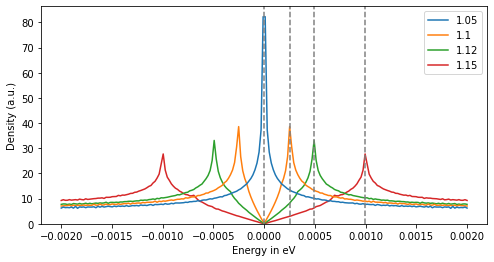

In [12]:
cutoff = 0.002
sns.kdeplot(data = df, clip = (-cutoff,cutoff), bw_adjust=0.004)
ax = plt.gca()
for Ev in Evs: 
    ax.axvline(Ev, ls = '--', c='gray')
ax.set_xlabel('Energy in eV')
ax.set_ylabel('Density (a.u.)')
fig = plt.gcf()
fig.set_figwidth(8)
plt.savefig('FigsPaper/HistogramDOS.pdf')

In [5]:
NewEvs = [ret_alpha_beta_Ev(angle, xGuess = [0.001,0.001])[1] for angle in angles]
print(NewEvs)
print(Evs)
ret_alpha_beta_Ev(1.05, xGuess = [0.001,0.001])

[2.5724428175070682e-08, 0.0001728503554077005, 0.0003363609248825129, 0.0006945852100315516]
[4.512924733571832e-07, 0.0002543922937604977, 0.000490829618218027, 0.0009989472110880737]


(array([   32.39935485, 10985.88192994]),
 2.5724428175070682e-08,
 (array([-0.00021331, -0.00012316]), 225, 4))

## For the sake of illustration 

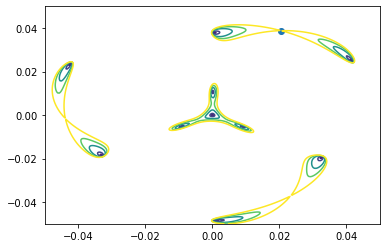

In [6]:
theta = 1.15 
X,Y,Z = data_for_contours(theta)
#plt.contour(X,Y,Z, levels = 50)
sad = ret_alpha_beta_Ev(theta)
Ev = sad[1]
Eset = Ev * np.array([1e-4, 0.01,0.05,0.1,0.2,0.5,0.75,1])
plt.contour(X,Y,Z, levels = Eset)
plt.scatter(sad[2][0][0],sad[2][0][1])

In [7]:
sad[2][0]

array([0.02053046, 0.03882698])

In [8]:
alpha,beta = ret_alpha_beta_Ev(theta)[0]
print(1/np.sqrt(-1*alpha*beta))

0.1066739658398047


In [9]:
alphanew,betanew = ret_alpha_beta_Ev(theta, xGuess = (0.001,0.001))[0]
print(1/np.sqrt(-1*alphanew*betanew))


0.012589316625299333


In [10]:
(1/np.sqrt(-1*alpha*beta)) / (1/np.sqrt(-1*alphanew*betanew))

8.473372226212344